In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
digits = load_digits(as_frame = True)
data = digits.data
target = digits.target
data.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [27]:
classifier = DecisionTreeClassifier()
score = cross_val_score(classifier, data, target, cv = 10)
print(score.mean())

0.8285940409683427


In [23]:
with open ("Decion_tree_task1.txt", "w") as fout:
    fout.write(str(score.mean()))


In [54]:
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, n_jobs = -1)
bagging_score = cross_val_score(bagging, data, target, cv = 10)
print(bagging_score.mean())
with open ("Decion_tree_task2.txt", "w") as fout:
    fout.write(str(bagging_score.mean()))

0.922613283674736


In [67]:
subset_power = int(np.sqrt(data.columns.shape[0]))
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(), max_features = subset_power, n_estimators = 100, n_jobs = -1)
bagging_score = cross_val_score(bagging, data, target, cv = 10)
print(bagging_score.mean(), subset_power)
with open ("Decion_tree_task3.txt", "w") as fout:
    fout.write(str(bagging_score.mean()))

0.9254252017380509 8


In [68]:
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_features = subset_power), n_estimators = 100, n_jobs = -1)
bagging_score = cross_val_score(bagging, data, target, cv = 10)
print(bagging_score.mean(), subset_power)
with open ("Decion_tree_task4.txt", "w") as fout:
    fout.write(str(bagging_score.mean()))

0.9476908752327746 8


## Исследование качества алгоритма от количества деревьев, количества признаков, а также глубины дерева

In [72]:
random_forest = RandomForestClassifier()
random_score = cross_val_score(random_forest, data, target, cv = 10)
print(random_score.mean())
with open ("Decion_tree_task5.txt", "w") as fout:
    fout.write(str(random_score.mean()))

0.951024208566108


## Зависимость от количества деревьев

In [20]:
nums = np.arange(10, 500, 10)
scores = np.zeros(len(nums))
for ind, num in enumerate(nums):
    print(ind, num)
    random_forest = RandomForestClassifier(n_estimators = num)
    scores[ind] = cross_val_score(random_forest, data, target, cv = 10, n_jobs = -1).mean()

0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
13 140
14 150
15 160
16 170
17 180
18 190
19 200
20 210
21 220
22 230
23 240
24 250
25 260
26 270
27 280
28 290
29 300
30 310
31 320
32 330
33 340
34 350
35 360
36 370
37 380
38 390
39 400
40 410
41 420
42 430
43 440
44 450
45 460
46 470
47 480
48 490


(10.0, 300.0)

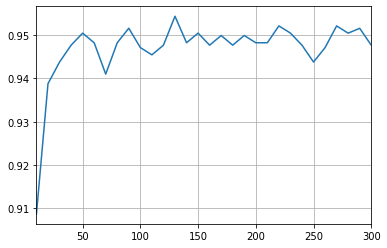

In [24]:
pylab.grid(True)
pylab.plot(nums, scores)
pylab.xlim((10, 300))

### Правильные ответы - 2, 3

## Зависимость от количества признаков

In [36]:
feature_fractions = np.arange(1, 64, 5)
print(type(feature_fractions[0]))
scores = np.zeros(len(feature_fractions))
for ind, frac in enumerate(feature_fractions):
    forest = RandomForestClassifier(max_features = frac)
    scores[ind] = cross_val_score(forest, data, target, cv = 10, n_jobs = 6).mean()

<class 'numpy.int32'>


(1.0, 64.0)

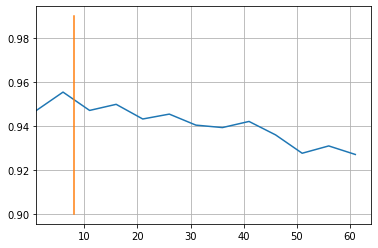

In [38]:
pylab.grid(True)
pylab.plot(feature_fractions, scores)
pylab.plot([8] * 10, np.arange(0.9, 1, 0.01))
pylab.xlim((1, 64))

### правильный ответ - 4

## Зависимость от глубины дерева

In [42]:
print(target.shape)

(1797,)


In [44]:
depths = np.arange(1, 100, 2)
scores = np.zeros(len(depths))
for ind, depth in enumerate(depths):
    forest = RandomForestClassifier(max_depth = depth)
    scores[ind] = cross_val_score(forest, data, target, cv = 10, n_jobs = 6).mean()

(0.0, 20.0)

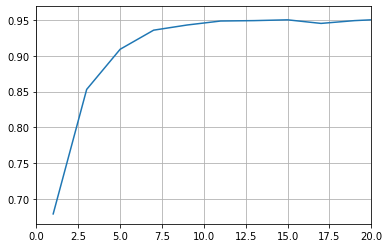

In [46]:
pylab.grid(True)
pylab.plot(depths, scores)
pylab.xlim((0, 20))

### правильный ответ - 7

In [50]:
with open("Decion_tree_taskt5.txt", "w") as fout:
    fout.write("2 3 4 7")